# P01 - Data Cleansing and evaluation

In [1]:
import pandas as pd
import numpy as np
import regex as re
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle

import matplotlib.pyplot as plt
import re

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Read data set

In [6]:
file_path = "../DataSet/"
file_name = "exercise_40_train.csv"
df = pd.read_csv(file_path+file_name)

In [7]:
df.shape

(40000, 101)

Check the column names and details as follow.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB


In [9]:
df.head()

y        x1         x2        x3        x4        x5        x6        x7  \
0  0  0.165254  18.060003       Wed  1.077380 -1.339233 -1.584341   0.0062%   
1  1  2.441471  18.416307    Friday  1.482586  0.920817 -0.759931   0.0064%   
2  1  4.427278  19.188092  Thursday  0.145652  0.366093  0.709962   -8e-04%   
3  0  3.925235  19.901257   Tuesday  1.763602 -0.251926 -0.827461  -0.0057%   
4  0  2.868802  22.202473    Sunday  3.405119  0.083162  1.381504   0.0109%   

         x8        x9  ...       x91       x92  x93       x94       x95  \
0  0.220784  1.816481  ... -0.397427  0.909479   no  5.492487       NaN   
1  1.192441  3.513950  ...  0.656651  9.093466   no  3.346429  4.321172   
2  0.952323  0.782974  ...  2.059615  0.305170   no  4.456565       NaN   
3 -0.520756  1.825586  ...  0.899392  5.971782   no  4.100022  1.151085   
4 -0.732739  2.151990  ...  3.003595  1.046096  yes  3.234033  2.074927   

         x96        x97  x98  x99        x100  
0  10.255579   7.627730    0  yes  104.251338  
1        NaN  10.505284    1  yes  101.230645  
2   8.754572   7.810979    0  yes  109.345215  
3        NaN   9.178325    1  yes  103.021970  
4   9.987006  11.702664    0  yes   92.925935  

[5 rows x 101 columns]

# Check out data for duplicates


In [10]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# # list all duplicate rows
# print(df[dups])

False


No duplicates found

In [11]:
df.dtypes.value_counts()

float64    86
object     12
int64       3
dtype: int64

there are 3 types of data in the data set

# Check out the object columns, number of uniques and number of NaNs

In [12]:
columns_obj_dtype = []
for col in df.columns:
    if df[col].dtypes == 'object':
        columns_obj_dtype.append(col)
print('columns_obj_dtype = ', columns_obj_dtype)

print(100*'=')


number_of_Obj_cols_with_nan = 0
columns_obj_dtype_NaN = []


for col in columns_obj_dtype:
    if df[col].isnull().sum() != 0:
        number_of_Obj_cols_with_nan = number_of_Obj_cols_with_nan + 1
        
        columns_obj_dtype_NaN.append(col)
        
        print('number of NaNs in ', col, '=', (df[col].isnull().sum())*100/(df.shape[0]), '%',
              '\nNumber of uniqs =', df[col].nunique(), '\n')
print('number_of_Obj_cols_with_nan ', number_of_Obj_cols_with_nan)

columns_obj_dtype =  ['x3', 'x7', 'x19', 'x24', 'x31', 'x33', 'x39', 'x60', 'x65', 'x77', 'x93', 'x99']
number of NaNs in  x24 = 9.64 % 
Number of uniqs = 2 

number of NaNs in  x33 = 17.9275 % 
Number of uniqs = 51 

number of NaNs in  x77 = 23.1425 % 
Number of uniqs = 7 

number of NaNs in  x99 = 32.09 % 
Number of uniqs = 1 

number_of_Obj_cols_with_nan  4


---
we do have 4 columns containing NaN with obj dtype.

Visualize the columns at the following bar plot.

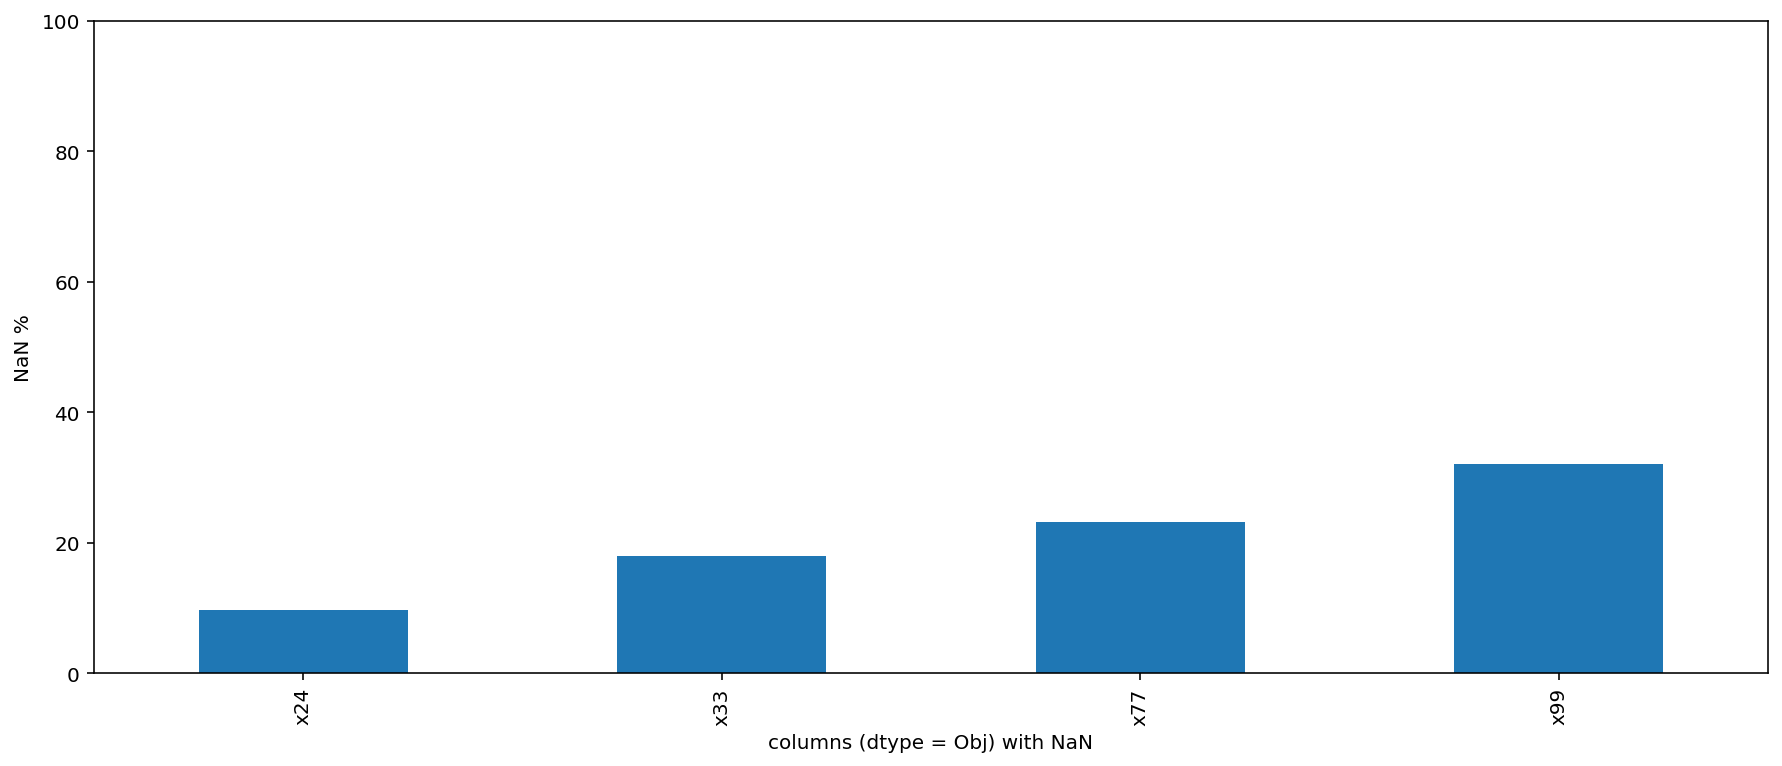

In [13]:
(df[columns_obj_dtype_NaN].isnull().sum()*100/(df.shape[0])).plot(kind='bar',figsize=(15,6))
plt.xlabel('columns (dtype = Obj) with NaN')
plt.ylabel('NaN %')
plt.ylim(0,100)
plt.show()

In [14]:
df[columns_obj_dtype].nunique()

x3        14
x7       663
x19    40000
x24        2
x31        2
x33       51
x39        1
x60       12
x65        5
x77        7
x93        2
x99        1
dtype: int64

# Checking out categorical columns one by one and make sure about values and types and etc

check out the 'x3' column

In [15]:
df['x3'].unique()

array(['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon'],
      dtype=object)

In [16]:
# https://stackoverflow.com/questions/60237488/python-replace-only-exact-word-in-string
for i, string in enumerate(df['x3'].values):
    df['x3'].values[i] = re.sub(r'\bTue\b', 'Tuesday', string)
    
for i, string in enumerate(df['x3'].values):
    df['x3'].values[i] = re.sub(r'\bSun\b', 'Sunday', string)
    
for i, string in enumerate(df['x3'].values):
    df['x3'].values[i] = re.sub(r'\bSat\b', 'Saturday', string)
    
for i, string in enumerate(df['x3'].values):
    df['x3'].values[i] = re.sub(r'\bFri\b', 'Friday', string)
    
for i, string in enumerate(df['x3'].values):
    df['x3'].values[i] = re.sub(r'\bWed\b', 'Wednesday', string)
    
for i, string in enumerate(df['x3'].values):
    df['x3'].values[i] = re.sub(r'\bMon\b', 'Monday', string)
    
for i, string in enumerate(df['x3'].values):
    df['x3'].values[i] = re.sub(r'\bThur\b', 'Thursday', string)


In [17]:
df['x3'].unique()

array(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

## x3 is nominal categorical feature (needs OneHotEncoder transformer) plus some edits should be done using customized function.

check out the 'x7' column

In [18]:
df['x7'].unique()

array(['0.0062%', '0.0064%', '-8e-04%', '-0.0057%', '0.0109%', '0.0079%',
       '0.0174%', '-0.0106%', '0.0032%', '0.0091%', '-0.0052%',
       '-0.0025%', '-0.0045%', '0.0068%', '-0.0137%', '-0.0014%',
       '-0.0013%', '0.0066%', '0.0097%', '-0.0086%', '0.0023%',
       '-0.0023%', '-0.0107%', '-0.0134%', '0.0058%', '-2e-04%',
       '-0.0033%', '-0.0172%', '-0.0026%', '-0.0118%', '0.0105%',
       '-0.0055%', '0.0095%', '0.0026%', '-0.0051%', '0.0054%',
       '-0.0167%', '0.0015%', '-0.0037%', '0.0011%', '-0.0097%',
       '-0.0016%', '-0.0155%', '0.015%', '-0.0032%', '2e-04%', '0.0122%',
       '0.0082%', '-0.0054%', '-0.0017%', '0.0013%', '0.0025%',
       '-0.0021%', '-0.017%', '-0.005%', '0.0014%', '-0.0103%', '-0.018%',
       '-0.0077%', '-0.0115%', '-0.0018%', '6e-04%', '-0.0169%',
       '0.0051%', '0.0093%', '-0.0043%', '0.0157%', '-0.0012%', '0.0056%',
       '-0.0035%', '0.005%', '0.0073%', '0.0127%', '0.0098%', '-0.0022%',
       '-0.0146%', '-0.0168%', '0.001%', '-0.

## x7 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.

In [19]:
df['x7'] = df['x7'].str.replace('%','')

In [20]:
df['x7'].dtypes

dtype('O')

In [21]:
df['x7'] = df['x7'].astype('float64')

In [22]:
df['x7'].dtypes

dtype('float64')

check out the 'x19' column

In [23]:
df['x19'].unique()

array(['$-908.650758424405', '$-1864.9622875143', '$-543.187402955527',
       ..., '$834.95775080472', '$-48.1031003332715', '$96.0017151741518'],
      dtype=object)

## x19 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.

In [24]:
df['x19'] = df['x19'].str.replace('$','')

In [25]:
df['x19'].dtypes

dtype('O')

In [26]:
df['x19'] = df['x19'].astype('float64')

In [27]:
df['x19'].dtypes

dtype('float64')

check out the 'x24' column

In [28]:
df['x24'].unique()

array(['female', 'male', nan], dtype=object)

## x24 column: is nominal category and needs to be transformed using One Hot Encoding

check out the x31 column

In [29]:
df['x31'].unique()

array(['no', 'yes'], dtype=object)

## x31 column: is nominal category and needs to be transformed using One Hot Encoding

check out the x33 column

In [30]:
df['x33'].unique()

array(['Colorado', 'Tennessee', 'Texas', 'Minnesota', 'New York',
       'Florida', 'Nebraska', 'California', nan, 'North Dakota',
       'Arizona', 'Alabama', 'Ohio', 'Pennsylvania', 'Iowa', 'Indiana',
       'Vermont', 'Arkansas', 'Massachusetts', 'Illinois', 'Georgia',
       'West Virginia', 'Connecticut', 'Virginia', 'North Carolina',
       'Montana', 'New Mexico', 'New Hampshire', 'Michigan', 'DC',
       'Washington', 'Louisiana', 'Kentucky', 'Utah', 'Missouri',
       'Oregon', 'Oklahoma', 'Nevada', 'Wisconsin', 'New Jersey',
       'Maryland', 'Maine', 'Alaska', 'Idaho', 'Wyoming', 'Rhode Island',
       'South Dakota', 'Mississippi', 'Kansas', 'Delaware', 'Hawaii',
       'South Carolina'], dtype=object)

## x33 column: is nominal category and needs to be transformed using One Hot Encoding

check out the x39 column

In [31]:
df['x39'].unique()

array(['5-10 miles'], dtype=object)

## Drop the column x39

check out the x60 column

In [32]:
df['x60'].unique()

array(['August', 'April', 'September', 'January', 'December', 'March',
       'July', 'November', 'June', 'February', 'October', 'May'],
      dtype=object)

## x60 is nominal and OneHotEncoder should be used to transfer this column

check out the x65 column

In [33]:
df['x65'].unique()

array(['farmers', 'allstate', 'geico', 'progressive', 'esurance'],
      dtype=object)

## x65 is nominal and OneHotEncoder should be used to transfer this column

check out the x77 column

In [34]:
df['x77'].unique()

array(['mercedes', 'subaru', 'nissan', 'toyota', nan, 'chevrolet',
       'buick', 'ford'], dtype=object)

## x77 is nominal and OneHotEncoder should be used to transfer this column


check out the x93 column

In [35]:
df['x93'].unique()

array(['no', 'yes'], dtype=object)

## x93 is nominal and OneHotEncoder should be used to transfer this column


check out the x99 (it has just one value - it is usedful)

In [36]:
df['x99'].unique()

array(['yes', nan], dtype=object)

## X99 should be droped - it has just one category. The x24, x33, and x77 columns NaN values needs to be replaced by their mode.


# Recap for categorical columns

* x3 is nominal categorical feature (needs OneHotEncoder transformer) and custom function edit is needed
* x7 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.
* x19 column: the % sign should be cleaned from strings and I need to change the dtype and introduce it as numeric feature.
* x24 column: is nominal category and needs to be transformed using One Hot Encoding
* x31 column: is nominal category and needs to be transformed using One Hot Encoding
* x33 column: is nominal category and needs to be transformed using One Hot Encoding
* x39 should be droped the column 
* x60 is nominal and OneHotEncoder should be used to transfer this column
* x65 is nominal and OneHotEncoder should be used to transfer this column
* x77 is nominal and OneHotEncoder should be used to transfer this column
* x93 is nominal and OneHotEncoder should be used to transfer this column
* X99 should be droped - it has just one category. 
* The x24, x33, and x77 columns NaN values needs to be replaced by their mode.


In [37]:
# OneHotEncoding columns
cols_to_be_OneHotEncoded = ['x3','x24','x31','x33',
                            'x60','x65','x77','x93']

cols_to_be_droped = ['x39','x99']

cols_to_be_imputed = ['x24','x33','x77']

cols_to_be_edited_custom_fun = ['x3', 'x7','x19']

# Dealing with NaNs in numerical columns NaN

Check out the numerics columns, number of uniques and number of NaNs

In [38]:
columns_numeric_dtype = []
for col in df.columns:
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        columns_numeric_dtype.append(col)
print('columns_numeric_dtype = ', columns_numeric_dtype)

print(100*'=')

columns_numeric_dtype =  ['y', 'x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x61', 'x62', 'x63', 'x64', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x94', 'x95', 'x96', 'x97', 'x98', 'x100']


In [39]:
df[columns_numeric_dtype].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       40000 non-null  int64  
 1   x1      40000 non-null  float64
 2   x2      40000 non-null  float64
 3   x4      40000 non-null  float64
 4   x5      37572 non-null  float64
 5   x6      40000 non-null  float64
 6   x7      40000 non-null  float64
 7   x8      40000 non-null  float64
 8   x9      40000 non-null  float64
 9   x10     40000 non-null  float64
 10  x11     34890 non-null  float64
 11  x12     40000 non-null  float64
 12  x13     40000 non-null  float64
 13  x14     30136 non-null  float64
 14  x15     40000 non-null  float64
 15  x16     28788 non-null  float64
 16  x17     40000 non-null  float64
 17  x18     40000 non-null  float64
 18  x19     40000 non-null  float64
 19  x20     40000 non-null  float64
 20  x21     40000 non-null  float64
 21  x22     37613 non-null  float64
 22

In [40]:
# check the object columns uniqueness
number_of_numeric_cols_with_nan = 0

columns_numeric_dtype_NaN = []
for col in columns_numeric_dtype:
    if df[col].isnull().sum() != 0:
        number_of_numeric_cols_with_nan = number_of_numeric_cols_with_nan+1
        columns_numeric_dtype_NaN.append(col)
        print('NaNs % in column ', col, '=', 
              df[col].isnull().sum()*100/(df.shape[0]), '%')#, 'var = ', df[col].var())

        # also if there is NaN add the column to cols_to_be_imputed
        cols_to_be_imputed.append(col)
        
        
        # also if the NaN% is greater than 50% drop it (add the column to drop col list)
        if df[col].isnull().sum()*100/(df.shape[0]) > 50:
            
            cols_to_be_droped.append(col)

print('\nnumber_of_numeric_cols_with_nan ', number_of_numeric_cols_with_nan)

NaNs % in column  x5 = 6.07 %
NaNs % in column  x11 = 12.775 %
NaNs % in column  x14 = 24.66 %
NaNs % in column  x16 = 28.03 %
NaNs % in column  x22 = 5.9675 %
NaNs % in column  x26 = 6.0825 %
NaNs % in column  x30 = 80.84 %
NaNs % in column  x38 = 6.005 %
NaNs % in column  x41 = 23.7575 %
NaNs % in column  x42 = 24.3225 %
NaNs % in column  x44 = 85.6175 %
NaNs % in column  x45 = 20.0225 %
NaNs % in column  x49 = 32.0575 %
NaNs % in column  x52 = 40.455 %
NaNs % in column  x54 = 31.82 %
NaNs % in column  x55 = 44.24 %
NaNs % in column  x57 = 81.16 %
NaNs % in column  x61 = 18.2325 %
NaNs % in column  x63 = 6.05 %
NaNs % in column  x64 = 12.7525 %
NaNs % in column  x67 = 6.0625 %
NaNs % in column  x68 = 5.96 %
NaNs % in column  x74 = 32.29 %
NaNs % in column  x75 = 13.1125 %
NaNs % in column  x76 = 13.1225 %
NaNs % in column  x78 = 28.4325 %
NaNs % in column  x79 = 6.075 %
NaNs % in column  x80 = 13.14 %
NaNs % in column  x83 = 6.07 %
NaNs % in column  x85 = 24.2875 %
NaNs % in column  

Let's calculate the average number of NaNs in numeric columns containing NaN 

In [41]:
average_percentage_NaN = (df[columns_numeric_dtype_NaN].isnull().sum().sum()*100/\
                          (df.shape[0]))/len(columns_numeric_dtype_NaN)
average_percentage_NaN = round(average_percentage_NaN,1)
print(f'average_percentage_NaN {average_percentage_NaN} %')

average_percentage_NaN 22.4 %


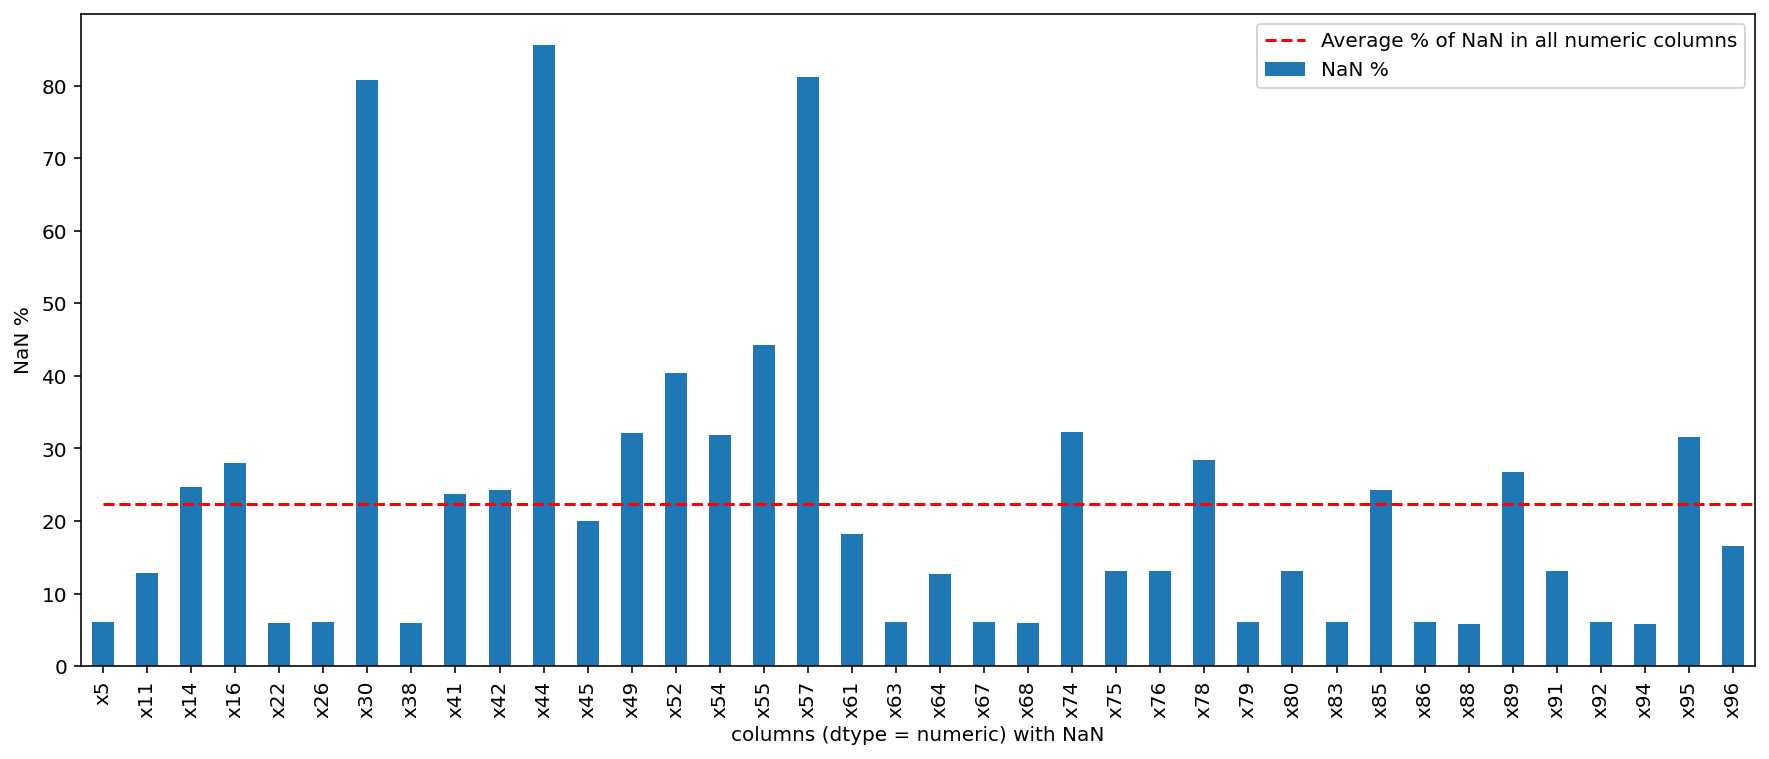

In [42]:
(df[columns_numeric_dtype_NaN].isnull().sum()*100/(df.shape[0])).plot(kind='bar',figsize=(15,6), label='NaN %')


plt.hlines(average_percentage_NaN,0,38, 
           linestyles='--',colors='r', label='Average % of NaN in all numeric columns')

plt.xlabel('columns (dtype = numeric) with NaN')
plt.ylabel('NaN %')
plt.legend()
plt.show()

so far so good. 
columns to be droped are:
    

In [43]:
print('cols_to_be_droped\n', cols_to_be_droped)

cols_to_be_droped
 ['x39', 'x99', 'x30', 'x44', 'x57']


columns to be imputed are:

In [44]:
print('cols_to_be_imputed\n', cols_to_be_imputed)

cols_to_be_imputed
 ['x24', 'x33', 'x77', 'x5', 'x11', 'x14', 'x16', 'x22', 'x26', 'x30', 'x38', 'x41', 'x42', 'x44', 'x45', 'x49', 'x52', 'x54', 'x55', 'x57', 'x61', 'x63', 'x64', 'x67', 'x68', 'x74', 'x75', 'x76', 'x78', 'x79', 'x80', 'x83', 'x85', 'x86', 'x88', 'x89', 'x91', 'x92', 'x94', 'x95', 'x96']


columns to be OneHotEncoded are:

In [45]:
print('cols_to_be_OneHotEncoded\n', cols_to_be_OneHotEncoded)

cols_to_be_OneHotEncoded
 ['x3', 'x24', 'x31', 'x33', 'x60', 'x65', 'x77', 'x93']


columns to be applied by custom_fun are:

In [46]:
print('cols_to_be_edited_custom_fun\n', cols_to_be_edited_custom_fun)

cols_to_be_edited_custom_fun
 ['x3', 'x7', 'x19']


# Using column transform and preforming two transformation on one column

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

In [63]:
X = df[['x3']]
y = df['y']

In [64]:
x_3_trans_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

In [65]:
col_transform = ColumnTransformer(transformers=[("x_3_trans_pipe", 
                                                 x_3_trans_pipe,['x3'])])

df2 = col_transform.fit_transform(X)

In [84]:
# col_transform.fit_transform(df)

In [74]:
logreg = LogisticRegression(solver='lbfgs')

In [80]:
pipe2 = make_pipeline(col_transform, clf)

In [81]:
cross_val_score(pipe2, X, y, cv=5, scoring='roc_auc').mean()

0.5382425690078237

In [117]:
from sklearn.compose import make_column_transformer


In [118]:
X = df[['x3', 'x24', 'x31', 'x33', 'x60', 'x65']]#, 'x77', 'x93']]
y = df['y']

x_3_trans_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

# col_transform = ColumnTransformer(transformers=[("x_3_trans_pipe", 
#                                                  x_3_trans_pipe,['x3', 'x24', 'x31', 
#                                                                  'x33', 'x60', 'x65'])])


col_transform  = make_column_transformer((x_3_trans_pipe, ['x3', 'x24', 'x31','x33', 'x60', 'x65']))

In [122]:
col_transform.fit_transform(X)

<40000x79 sparse matrix of type '<class 'numpy.float64'>'
	with 240000 stored elements in Compressed Sparse Row format>

In [124]:
logreg = LogisticRegression(solver='lbfgs')
pipe2 = make_pipeline(col_transform, logreg)
cross_val_score(pipe2, X, y, cv=5, scoring='roc_auc')

array([0.855   , 0.855   ,      nan, 0.854875,      nan])

In [96]:
np.isnan(df2.data).any()

False

In [95]:
# print(df2[0, :].toarray())

In [88]:
col_transform.fit_transform(X)

<40000x74 sparse matrix of type '<class 'numpy.float64'>'
	with 200000 stored elements in Compressed Sparse Row format>